### This is one of the famous data sets to diagonise the Breast Cancer obtained from sklearn library..

#### Required Libraries

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import pickle
import xgboost as xgb
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#### Loading Famous Brest Cancer datasets From Sklearn

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
print('Target Names:-')
list(data['target_names'])

Target Names:-


['malignant', 'benign']

#### Descriptions of the datasets 

In [4]:
print('\nDescription of the Datasets:-\n')
print(data.DESCR)


Description of the Datasets:-

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For ins

In [5]:
x = pd.DataFrame(data['data'],columns=data['feature_names'])
y = pd.DataFrame(data['target'],columns=['Cancer'])

In [6]:
x.shape,y.shape

((569, 30), (569, 1))

In [7]:
Df = pd.concat([y,x],1).copy()
Df.head(2)

,Cancer,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


* saving datasets into csv file

In [8]:
Df.to_csv("data.csv",index=False)

# EDA

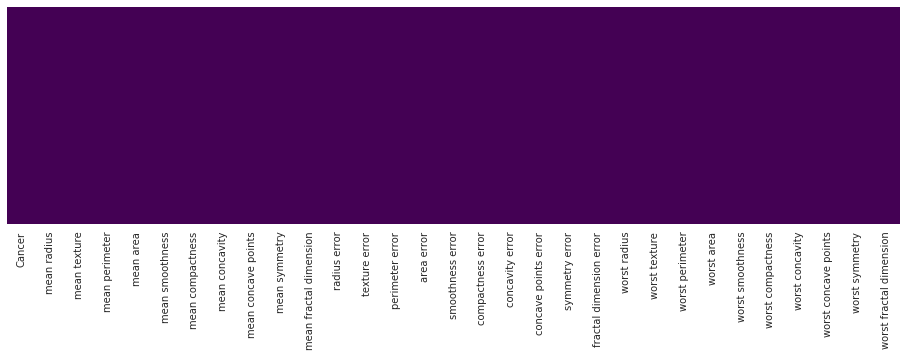

Total Null Values = 0


In [9]:
plt.figure(figsize=(16,4))
sns.heatmap(Df.isnull(),yticklabels=False,cmap='viridis',cbar=False)
plt.show()
print("Total Null Values =",Df.isnull().sum().sum())

##### ploting the target & chequing whethere it is abnormal or not!

In [10]:
dict = {0:'Malignant',1:'Benign'}

ynum = y['Cancer'].map(dict)

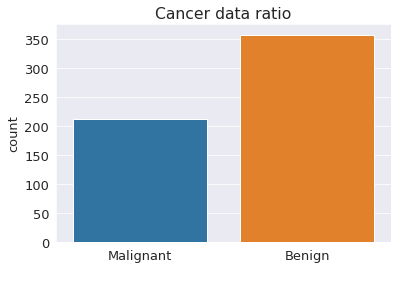

In [11]:
plt.rcParams['font.size'] =13
sns.set_style('darkgrid')
sns.countplot(ynum)
plt.xlabel(' ')
plt.title('Cancer data ratio')
plt.show()

In [12]:
Df.describe()

,Cancer,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Pearson Co-relation of independent-features with Cancer(target):-



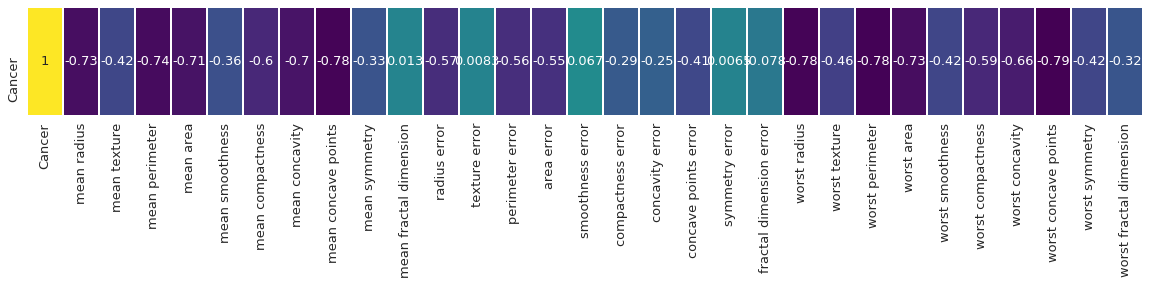

In [13]:
print('Pearson Co-relation of independent-features with Cancer(target):-\n')
plt.figure(figsize=(20,2))
sns.heatmap(Df.corr()[['Cancer']].T,annot=True,linewidths=1,cmap='viridis',cbar=False)
plt.show()

##### scaling the datset with standard normal distribution

In [14]:
scaler=StandardScaler()
X = scaler.fit_transform(x)

In [15]:
del Df

In [16]:
X = pd.DataFrame(X,columns=x.columns)

In [17]:
del x

Standard Normal Distribution & Box-Plot :


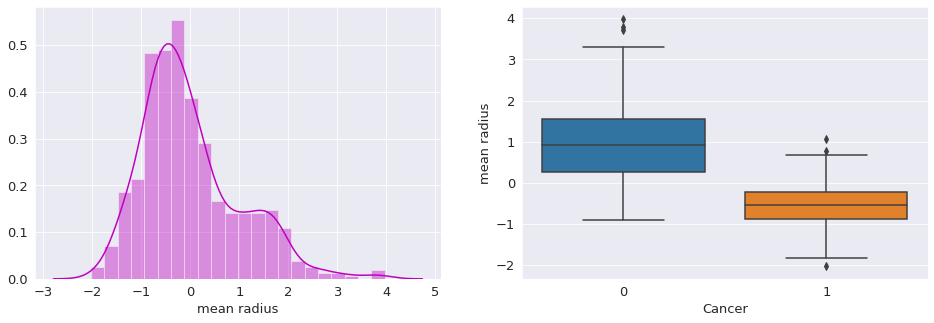

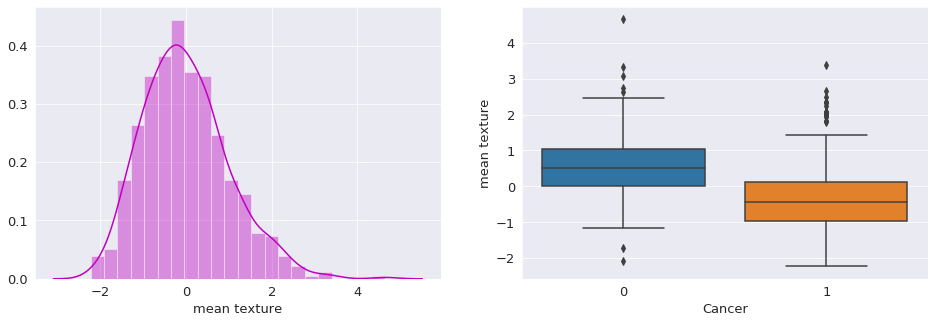

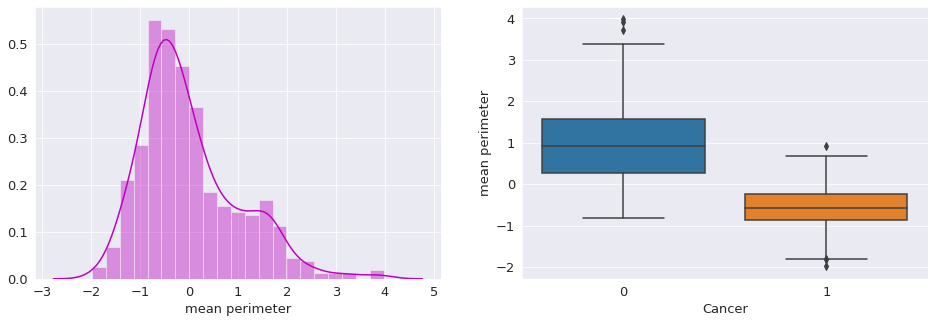

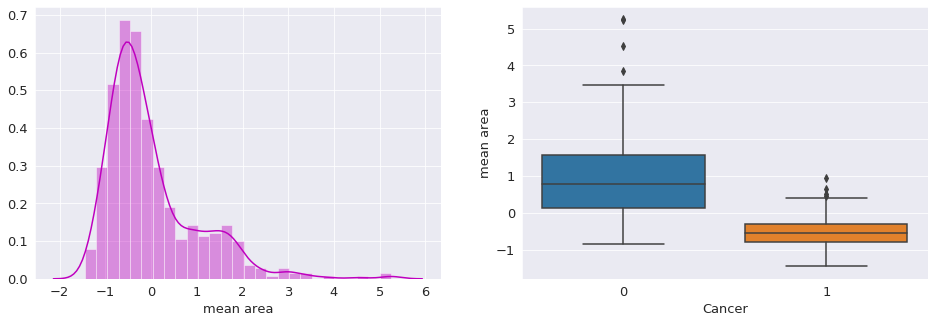

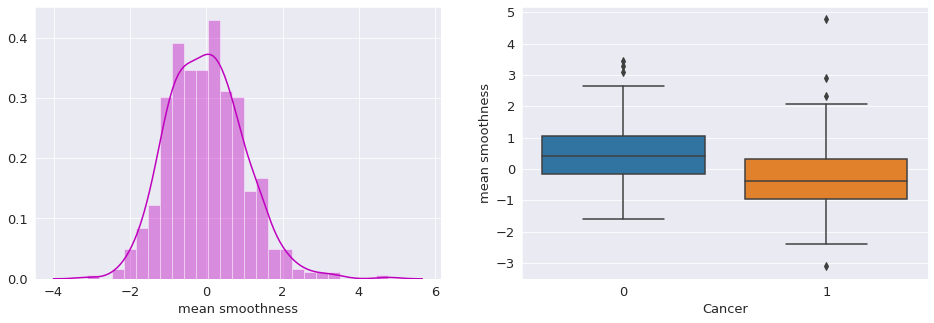

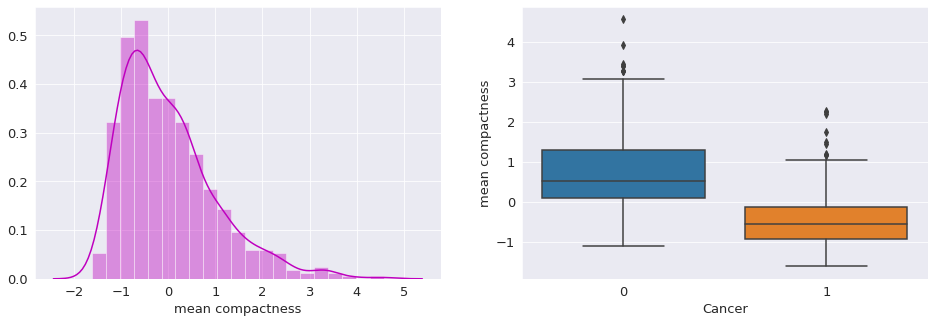

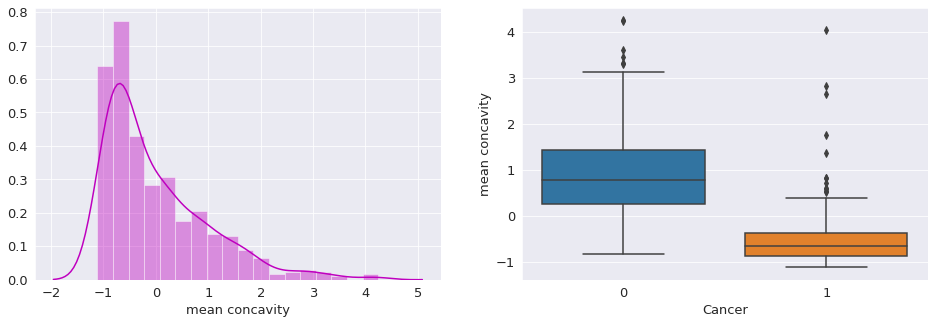

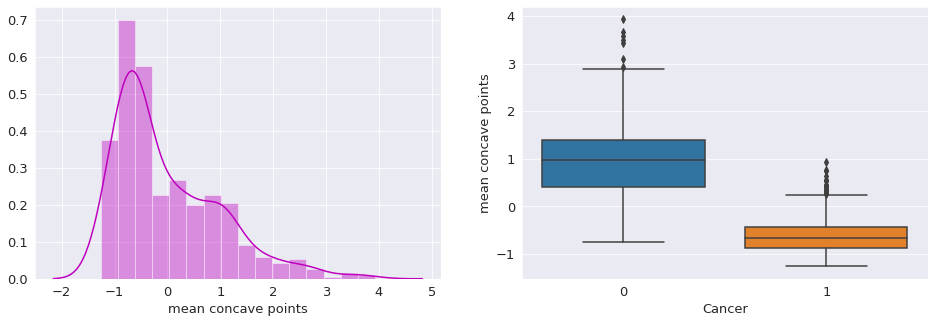

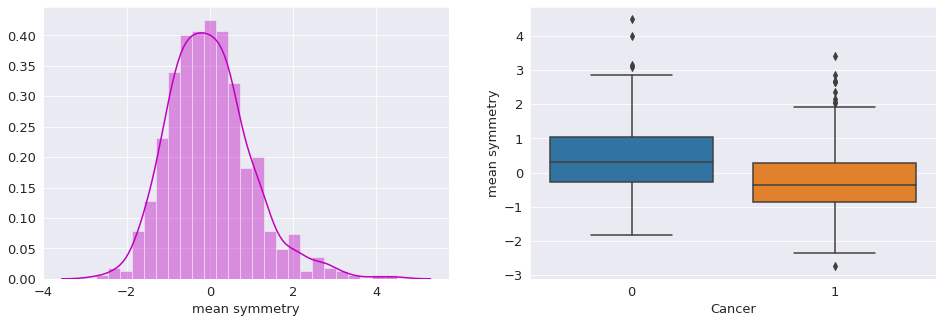

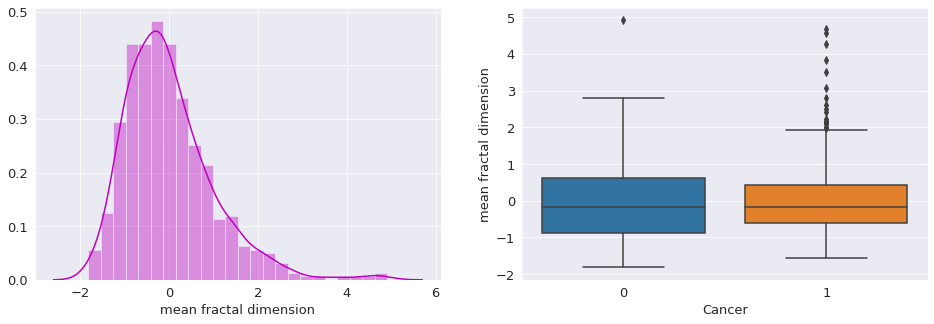

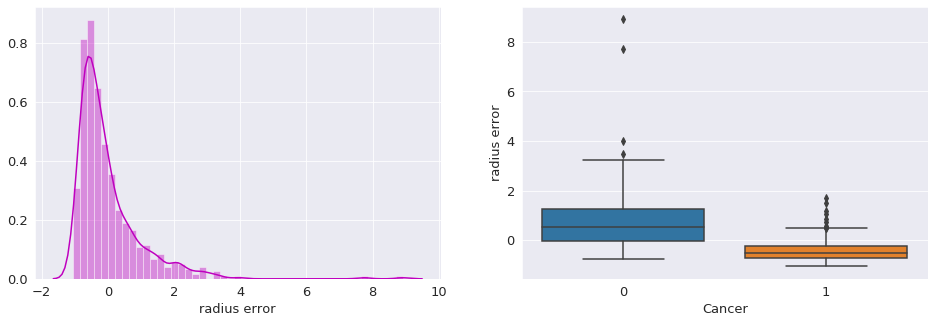

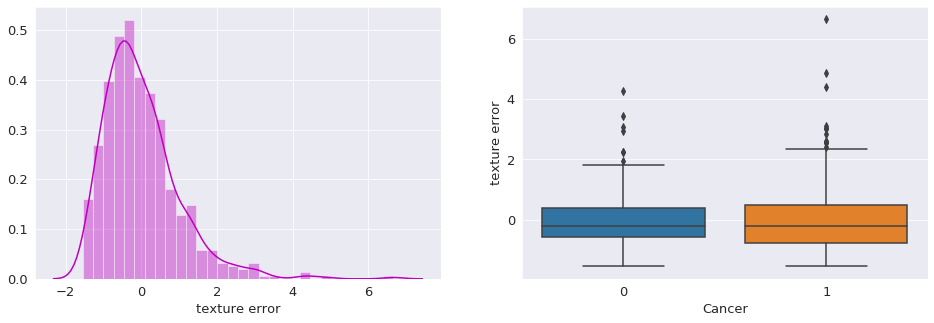

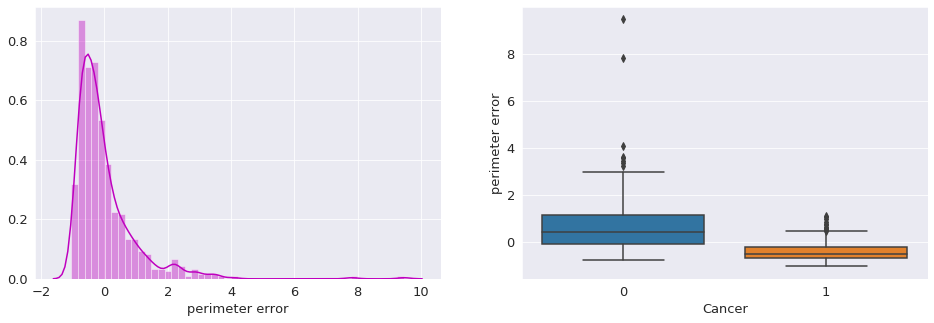

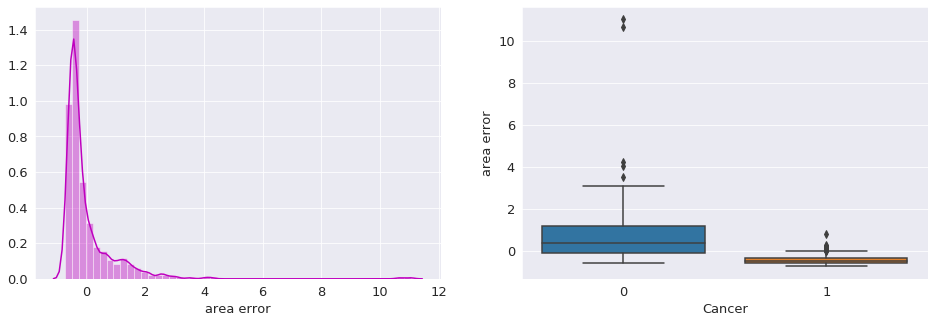

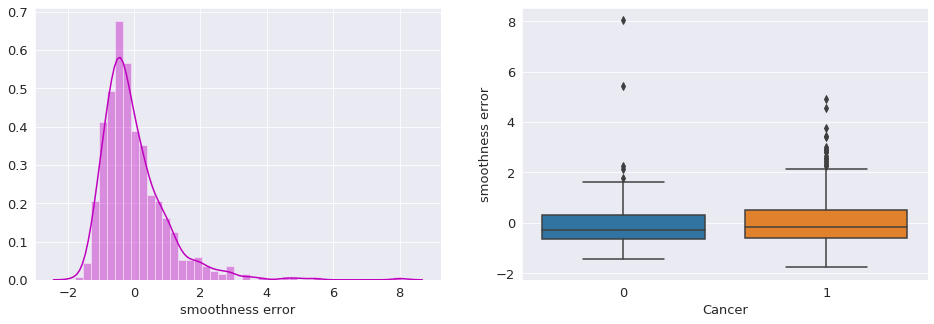

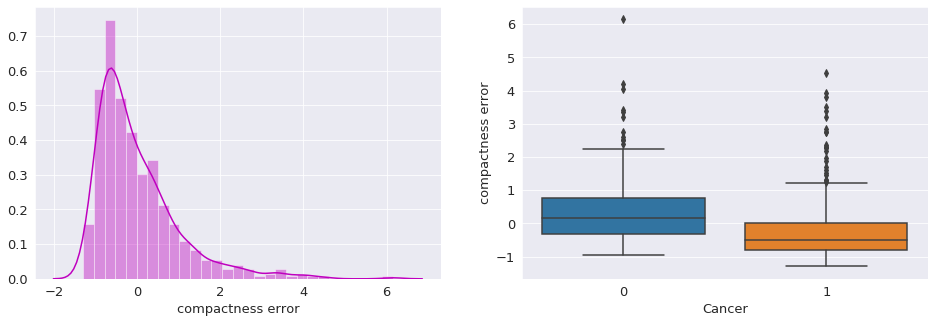

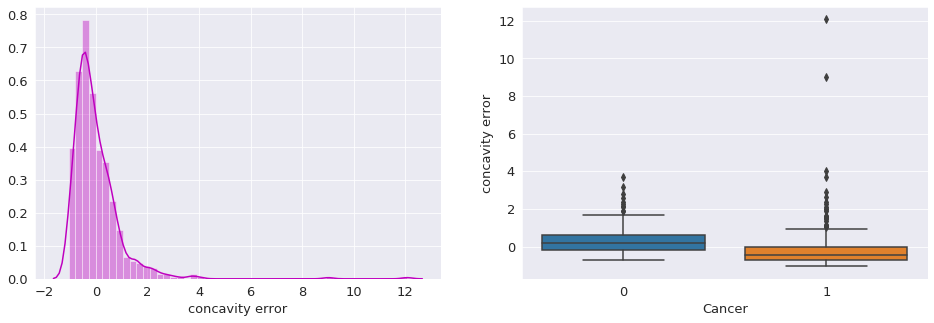

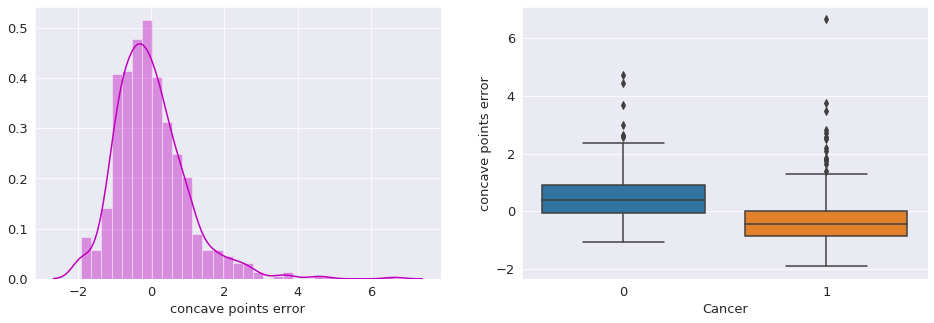

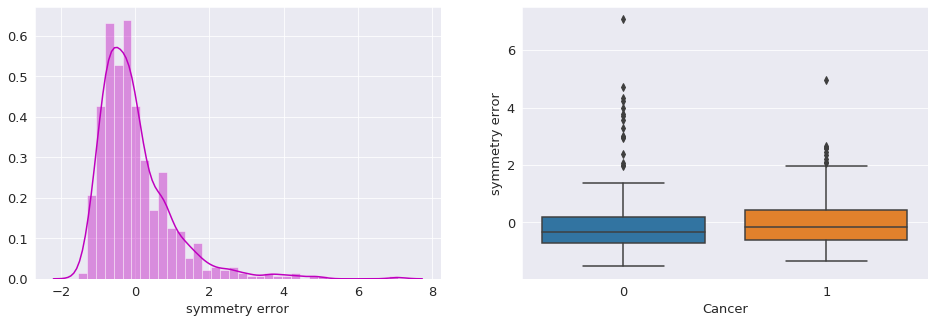

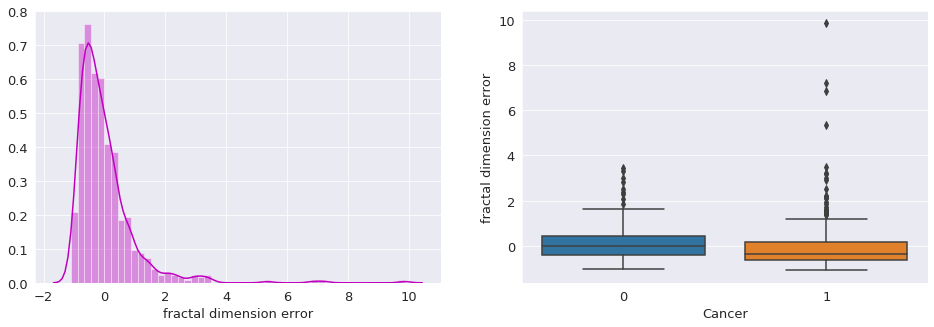

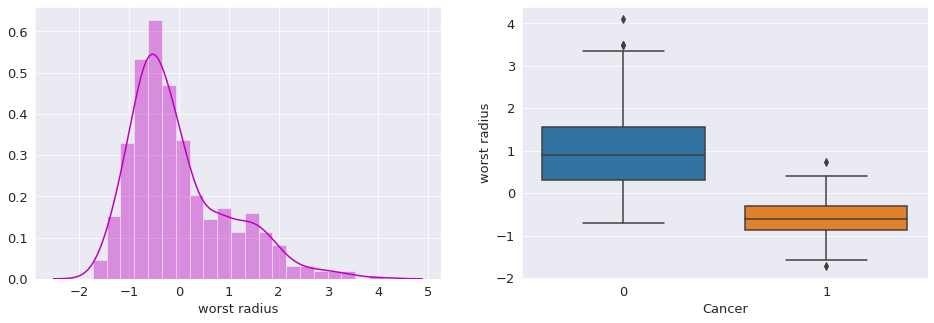

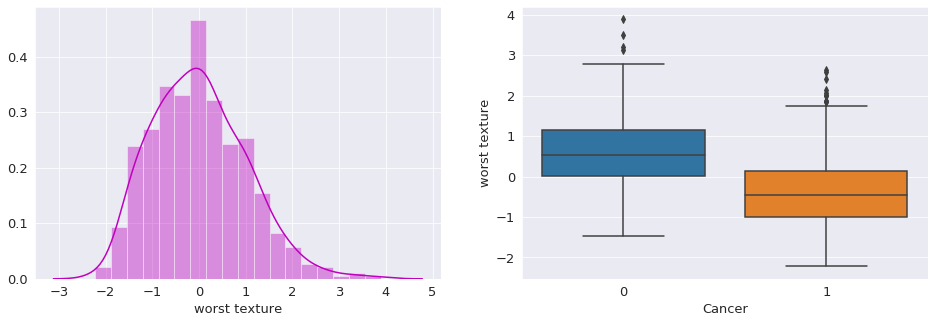

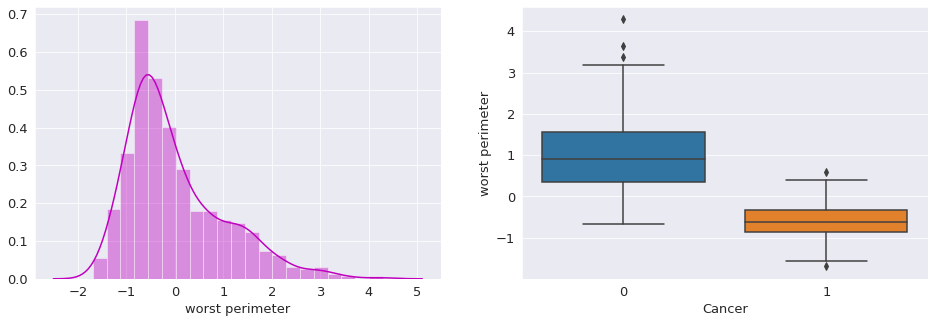

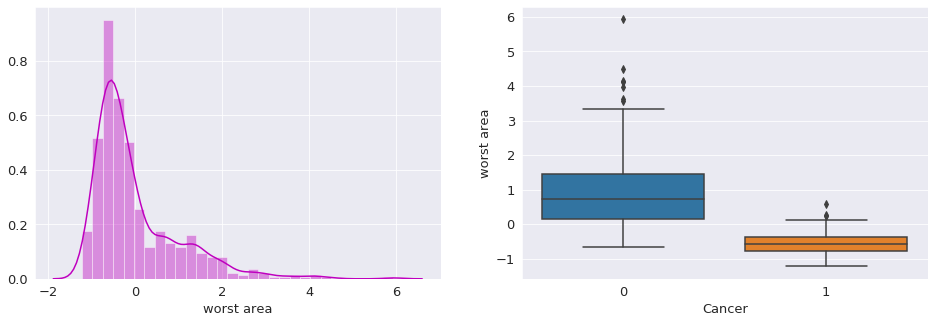

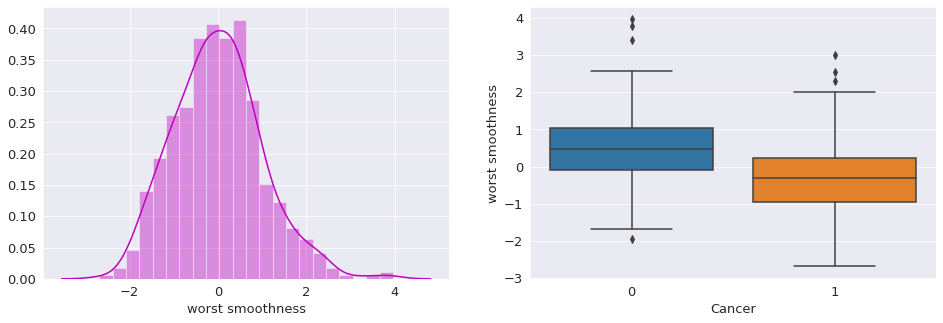

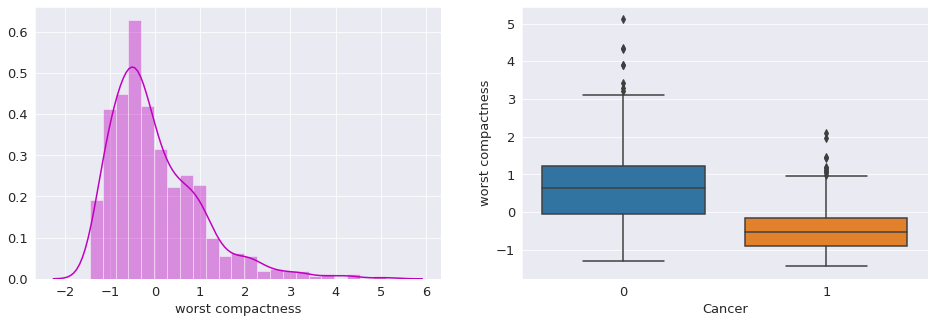

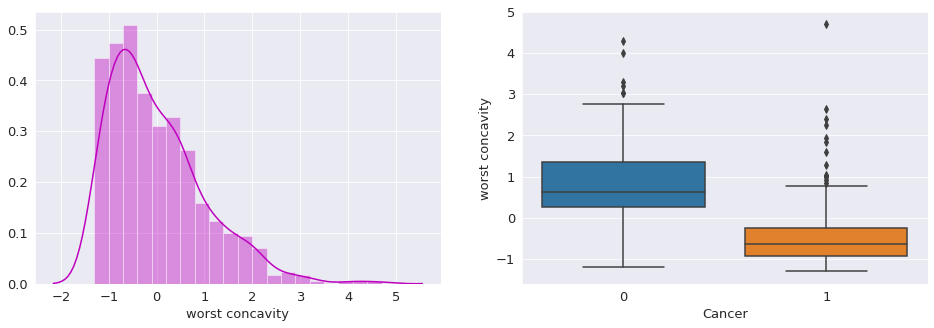

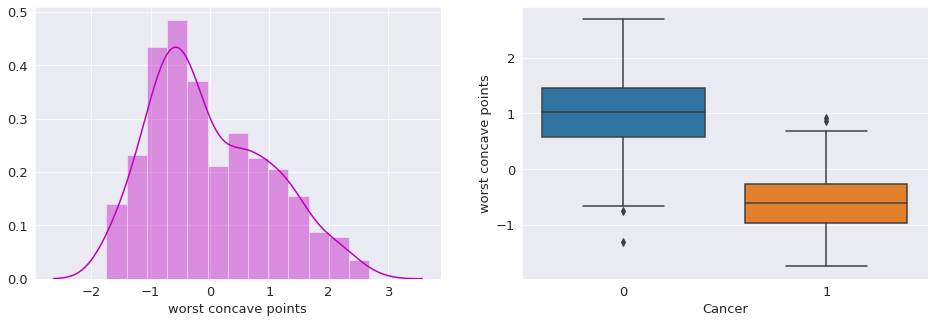

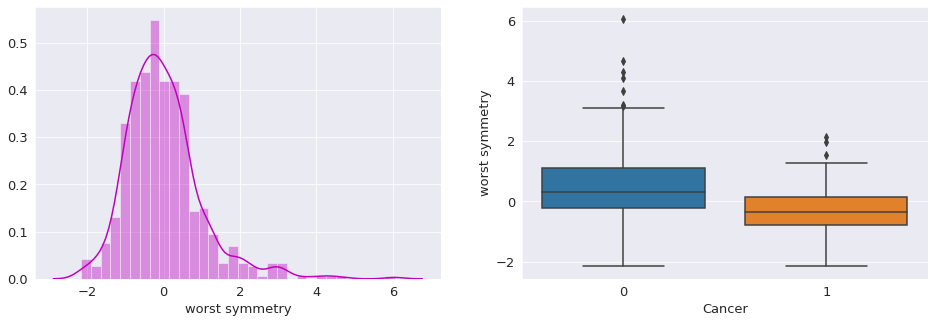

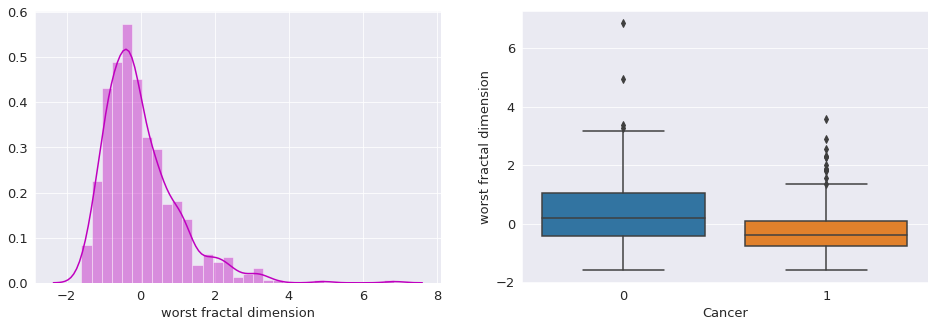

In [18]:
print('Standard Normal Distribution & Box-Plot :')
for col in X.columns:
    plt.rcParams['font.size'] =13
    f,(ax1,ax2) = plt.subplots(1,2,figsize=(16,5))
    a = X[col]
    b = y['Cancer']
    sns.distplot(a,color='m',ax=ax1)
    sns.boxplot(b,a,ax=ax2)
    plt.show()

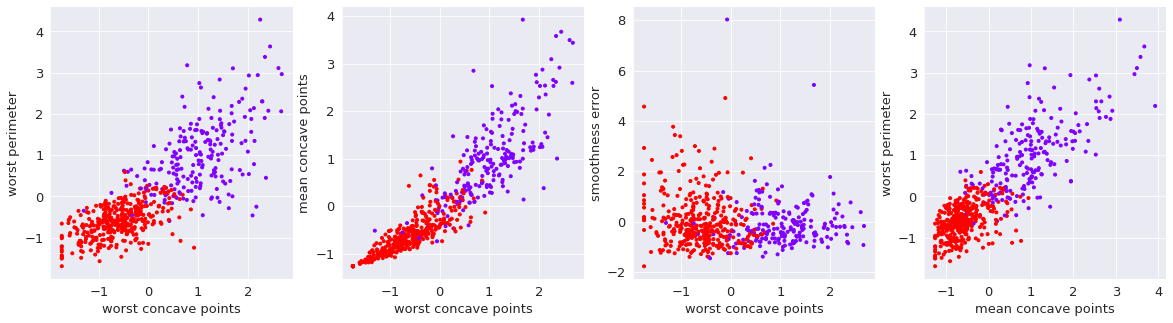

In [19]:
f,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(20,5))
ax1.scatter(X['worst concave points'],X['worst perimeter'],c=y.Cancer,marker='.',cmap='rainbow')
ax2.scatter(X['worst concave points'],X['mean concave points'],c=y.Cancer,marker='.',cmap='rainbow')
ax3.scatter(X['worst concave points'],X['smoothness error'],c=y.Cancer,marker='.',cmap='rainbow')
ax4.scatter(X['mean concave points'],X['worst perimeter'],c=y.Cancer,marker='.',cmap='rainbow')

ax1.set_xlabel('worst concave points')
ax1.set_ylabel('worst perimeter')
ax2.set_xlabel('worst concave points')
ax2.set_ylabel('mean concave points')
ax3.set_xlabel('worst concave points')
ax3.set_ylabel('smoothness error')
ax4.set_xlabel('mean concave points')
ax4.set_ylabel('worst perimeter')
sns.despine()
plt.show()

* Scatter plot showing classifications

### Feature Selection LASSO Method 

In [21]:
lasso = Lasso(alpha=0.1, max_iter=2000)
lasso.fit(X,y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=2000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [22]:
coeff_values = pd.DataFrame({'coeff':lasso.coef_},index=X.columns).sort_values(by='coeff')
c = (abs(coeff_values.coeff) > 0)
col_imp = list(X.columns[c])
col_imp

['mean radius', 'mean texture', 'mean perimeter', 'mean area']

In [23]:
x = X[col_imp].copy()
x.shape

(569, 4)

In [24]:
df = pd.concat([x,ynum],1).copy()

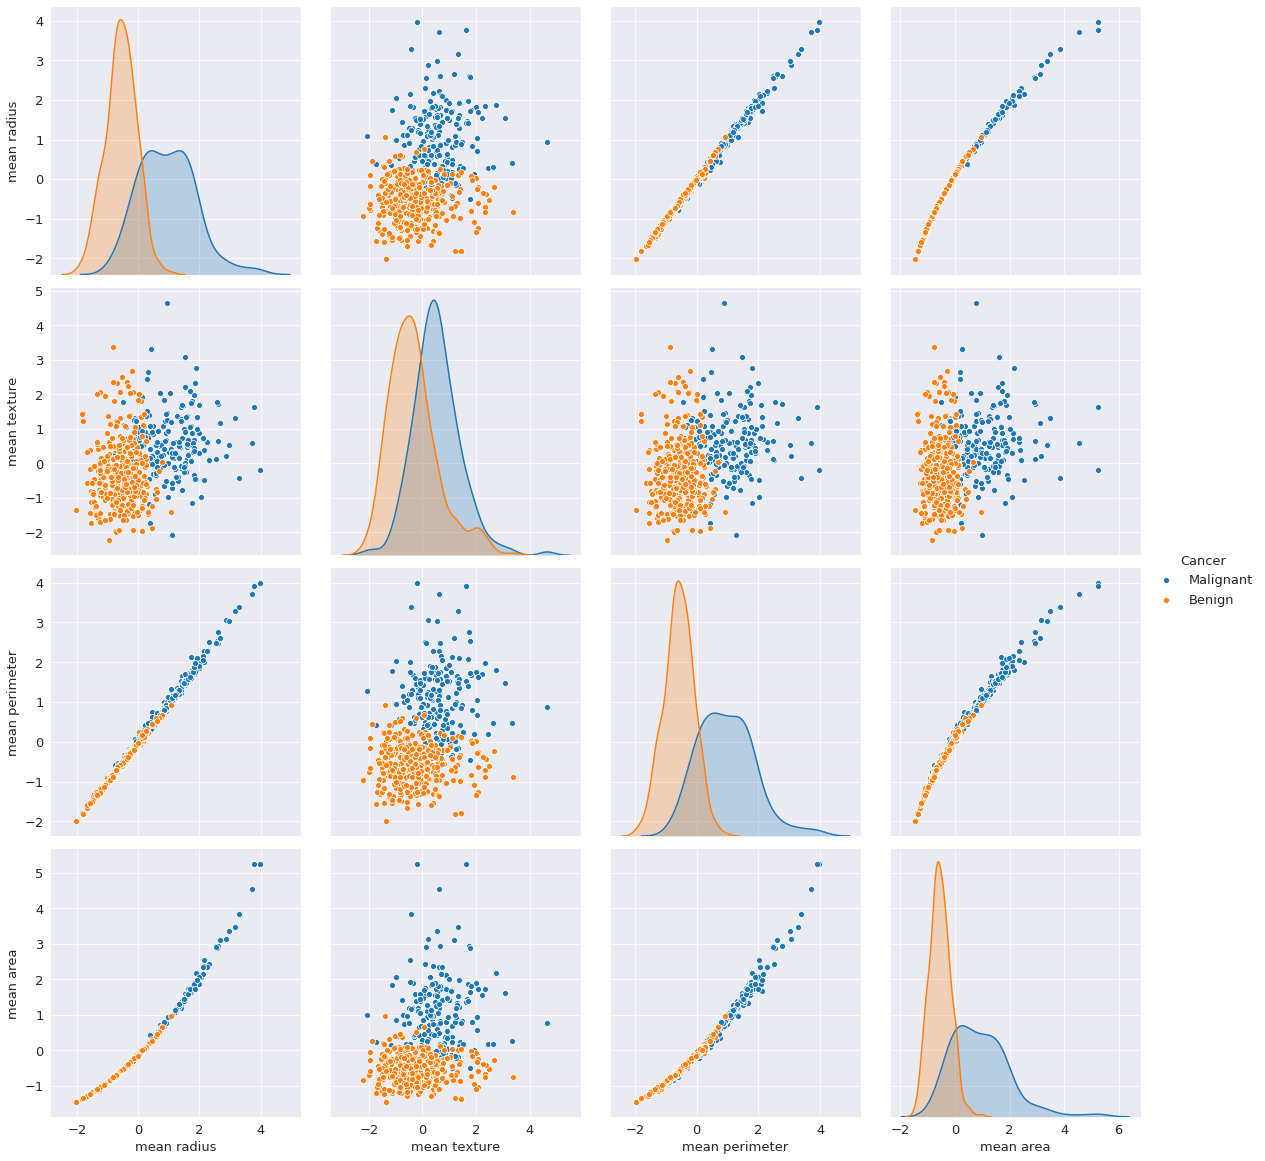

In [25]:
sns.pairplot(df,hue='Cancer',height=4)
plt.show()

#### **I will remove few outliers from 'Mean Texture'-Benign, see the distribution plot is overlaping to the right end , otherwise classification is perfect for all other features

In [26]:
benign = df[df['Cancer']== 'Benign']

In [27]:
bx = benign['mean texture']

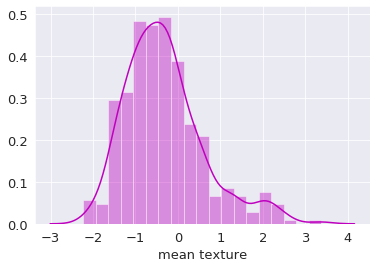

Skew : 0.98


In [28]:
sns.distplot(bx,color='m')
plt.show()
print('Skew :',round(bx.skew(),2))

#### Z-score - method

In [29]:
def Zscore(data,left,right):
    index= []
    mean = data.mean()
    std = data.std()
    for i in range(len(data)):
        z = (data.iloc[i]-mean)/std
        if (z >= -left) and (z <= right): 
            index.append(i)
        else:
            pass
    return index 

In [30]:
index = Zscore(bx,4,2.2)
len(bx)-len(index)

18

In [31]:
bx = bx.iloc[index].reset_index(drop=True)

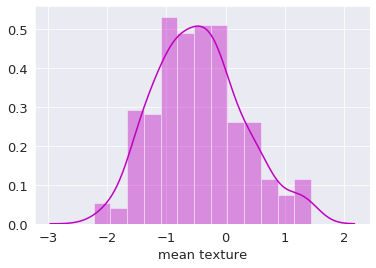

Skew : 0.35


In [32]:
sns.distplot(bx,color='m')
plt.show()
print('Skew :',round(bx.skew(),2))

* So, this is better than before, here only 18 rows to be removed

* here you can look the difference

#### Making clean indices

In [33]:
index1 = df[df['Cancer']== 'Malignant'].index

In [34]:
clean_index = list(index1) + index

In [35]:
len(clean_index)

551

In [36]:
df = df.iloc[clean_index].reset_index(drop=True)

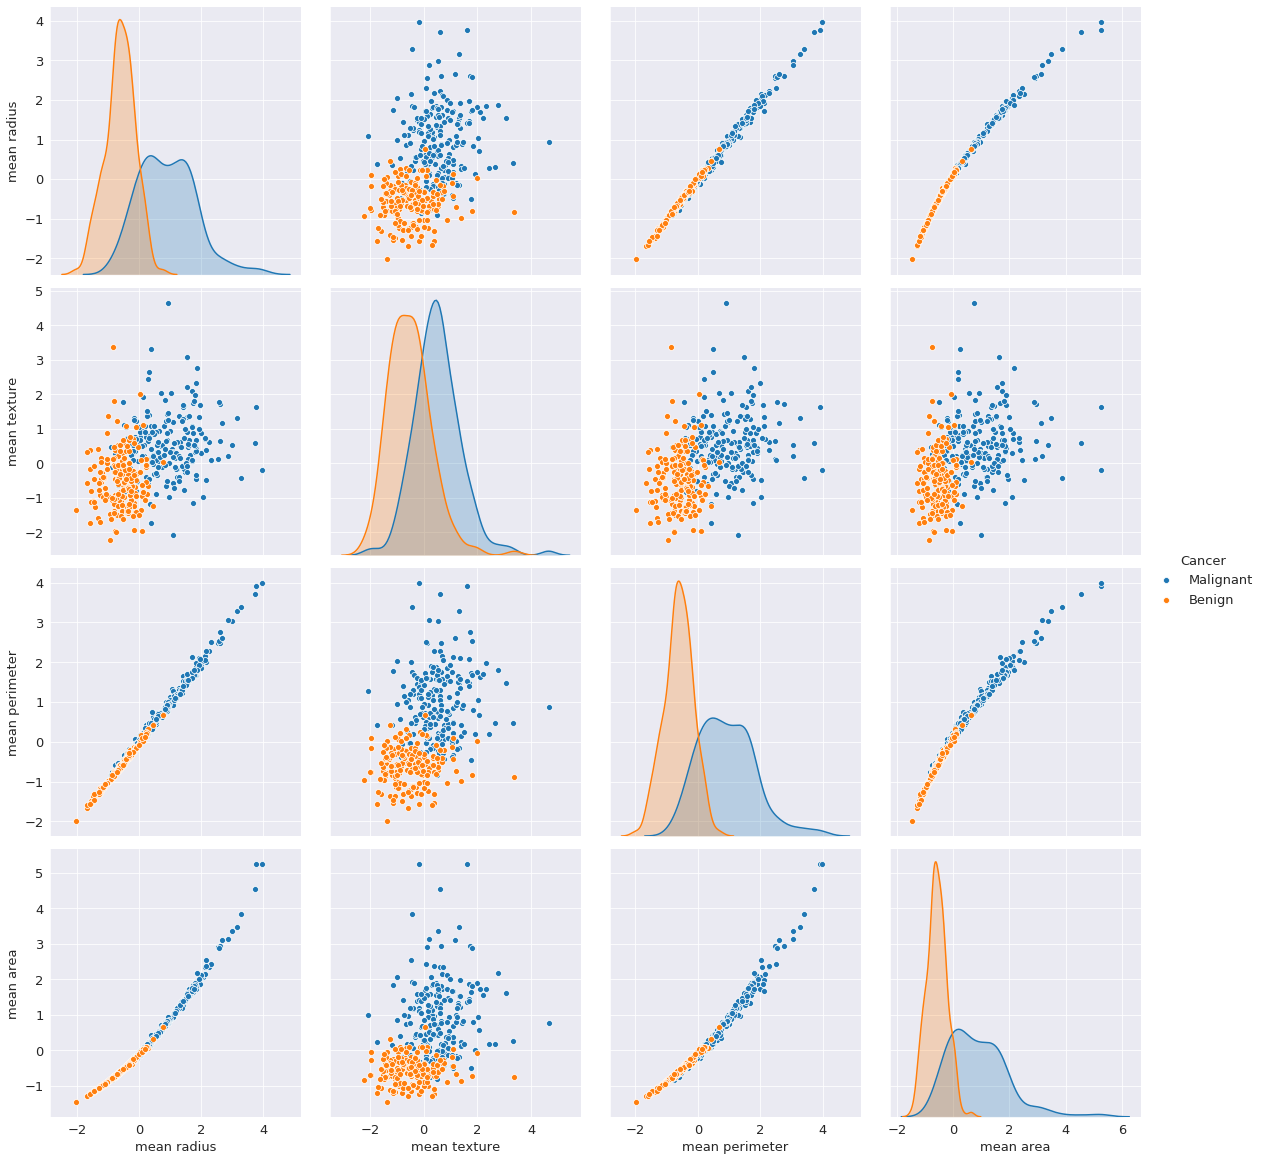

In [37]:
sns.pairplot(df,hue='Cancer',height=4)
plt.show()

In [38]:
del df,X,bx,

In [39]:
df = pd.concat([y,x],1).copy()

In [40]:
Df = df.iloc[clean_index].reset_index(drop=True).copy()

In [41]:
Df.shape

(551, 5)

* so, 18 outliers are eleminated

In [42]:
del df,x,y

In [43]:
X = Df.drop('Cancer',1).copy()
y = Df['Cancer'].copy()

In [44]:
del Df

In [45]:
X.shape,y.shape

((551, 4), (551,))

### Training the Model with Stratified train test split

In [46]:
sp = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in sp.split(X,y):
    xtrain,xtest = X.iloc[train_index],X.iloc[test_index]
    ytrain,ytest = y.iloc[train_index],y.iloc[test_index]

In [47]:
print("Lenth of train data:",len(ytrain))
print("Lenth of test data :",len(ytest))

Lenth of train data: 440
Lenth of test data : 111


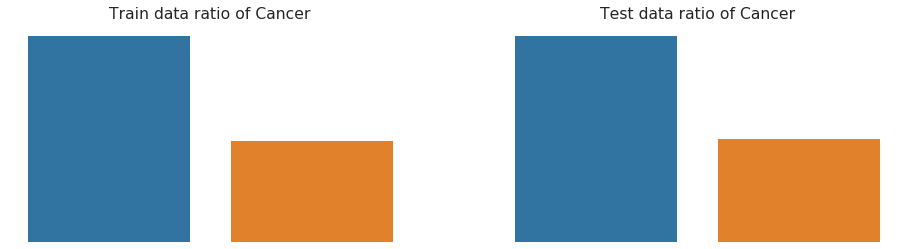

In [48]:
f,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
sns.countplot(ytrain,ax=ax1,hue=None)
ax1.set_title('Train data ratio of Cancer')
ax1.set_axis_off()
sns.countplot(ytest,ax=ax2)
ax2.set_title('Test data ratio of Cancer')
ax2.set_axis_off()
plt.show()

### Training and Evaluating the Model with XGBoost classifier

In [49]:
model =  xgb.XGBClassifier(random_state=0,n_jobs=1)

In [50]:
model.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [51]:
pred = model.predict(xtest)

In [52]:
accuracy_score(pred,ytest)

0.963963963963964

### Hyperperametre Tuning with Grid Search CV

In [53]:
param =[{"max_depth":[2,3,4,5],
    "learning_rate":[0.001,0.01,0.1,1],
    "n_estimators":[100,150,200,250]}]
search = GridSearchCV(estimator=model,iid=False,param_grid=param,scoring='accuracy',cv=6,n_jobs=-1)
output = search.fit(X,y)
print('Best perameter :',output.best_params_)
print('Acccuracy      :',round(output.best_score_,2)*100,'%')

Best perameter : {'learning_rate': 1, 'max_depth': 5, 'n_estimators': 100}
Acccuracy      : 97.0 %


### Making Random State Tuning

In [54]:
def train(X,y,rs=0):
    model =  xgb.XGBClassifier(max_depth=5,learning_rate=1,n_estimators=100,random_state=rs,n_jobs=1)
    sp = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=rs)
    for train_index,test_index in sp.split(X,y):
        xtrain,xtest = X.iloc[train_index],X.iloc[test_index]
        ytrain,ytest = y.iloc[train_index],y.iloc[test_index]
        model.fit(xtrain,ytrain)
        pred = model.predict(xtest)
        acc = accuracy_score(pred,ytest)
    print(f'Random State :{rs} & Accuracy :{round(acc*100,2)}')

In [55]:
train(X,y)

Random State :0 & Accuracy :98.2


In [56]:
for i in range(42):
    train(X,y,i)   

Random State :0 & Accuracy :98.2
Random State :1 & Accuracy :88.29
Random State :2 & Accuracy :95.5
Random State :3 & Accuracy :96.4
Random State :4 & Accuracy :96.4
Random State :5 & Accuracy :90.99
Random State :6 & Accuracy :91.89
Random State :7 & Accuracy :99.1
Random State :8 & Accuracy :97.3
Random State :9 & Accuracy :96.4
Random State :10 & Accuracy :95.5
Random State :11 & Accuracy :93.69
Random State :12 & Accuracy :92.79
Random State :13 & Accuracy :98.2
Random State :14 & Accuracy :98.2
Random State :15 & Accuracy :94.59
Random State :16 & Accuracy :93.69
Random State :17 & Accuracy :97.3
Random State :18 & Accuracy :93.69
Random State :19 & Accuracy :93.69
Random State :20 & Accuracy :98.2
Random State :21 & Accuracy :96.4
Random State :22 & Accuracy :93.69
Random State :23 & Accuracy :95.5
Random State :24 & Accuracy :94.59
Random State :25 & Accuracy :92.79
Random State :26 & Accuracy :97.3
Random State :27 & Accuracy :96.4
Random State :28 & Accuracy :95.5
Random State

In [57]:
train(X,y,38)

Random State :38 & Accuracy :100.0




Accuracy Score for Test Data :100.0%


Classification Report for Test Data :-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       1.00      1.00      1.00        37

    accuracy                           1.00       111
   macro avg       1.00      1.00      1.00       111
weighted avg       1.00      1.00      1.00       111

**************************************************************************************************************


Accuracy Score for Train Data :100.0%


Classification Report for Train Data :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       295
           1       1.00      1.00      1.00       145

    accuracy                           1.00       440
   macro avg       1.00      1.00      1.00       440
weighted avg       1.00      1.00      1.00       440

**************************************************************************

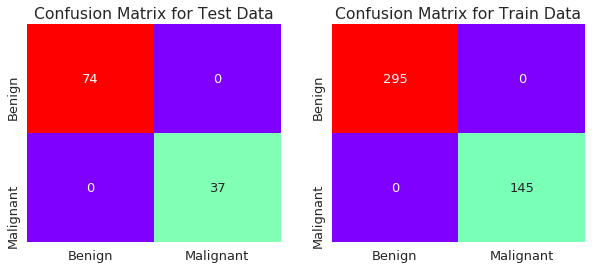

In [58]:
model =  xgb.XGBClassifier(max_depth=5,learning_rate=1,random_state=38,n_jobs=1)
sp = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=38)
for train_index,test_index in sp.split(X,y):
    xtrain,xtest = X.iloc[train_index],X.iloc[test_index]
    ytrain,ytest = y.iloc[train_index],y.iloc[test_index]
    model.fit(xtrain,ytrain)
    pred = model.predict(xtest)
    acc = accuracy_score(pred,ytest)*100
    conf = pd.DataFrame(confusion_matrix(pred,ytest),
                        columns=['Benign','Malignant'],index=['Benign','Malignant'])
    clas = classification_report(pred,ytest)
    predr = model.predict(xtrain)
    accr = accuracy_score(predr,ytrain)*100
    confr = pd.DataFrame(confusion_matrix(predr,ytrain),
                         columns=['Benign','Malignant'],index=['Benign','Malignant'])
    clasr = classification_report(predr,ytrain)
    
    
 
print("\n")
print(f"Accuracy Score for Test Data :{acc}%")
print("\n")
print("Classification Report for Test Data :-")
print(clas)
print('*'*110)
print("\n")
print(f"Accuracy Score for Train Data :{accr}%")
print("\n")
print(f"Classification Report for Train Data :")
print(clasr)
print('*'*110)
c = confusion_matrix(ytest,pred)
print('Result for test data:-\n')
print('Total test data    :',len(ytest))
print('Correct Prediction :',(c[0][0]+c[1][1]))
print('False Positive     :',c[0][1])
print('False Negetive     :',c[1][0])
print('Accurecy           :',round((c[0][0]+c[1][1])*100/len(ytest),2),'%')
print('*'*110)
f,(ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
sns.heatmap(conf,annot=True,cbar=False,cmap='rainbow',fmt='.3g',ax=ax1)
ax1.set_title("Confusion Matrix for Test Data")
sns.heatmap(confr,annot=True,cbar=False,cmap='rainbow',fmt='.3g',ax=ax2)
ax2.set_title("Confusion Matrix for Train Data")
plt.show()

### Saving  :- model and processed X-data

In [60]:
#saving model
pkl = open("model.pickle","wb")
pickle.dump(model,pkl)
pkl.close()

In [61]:
# saving X-data
X.to_csv('X.csv',index=False)

In [62]:
del model
del xtrain,ytrain,xtest,ytest

### opening :- model and processed X-data

In [63]:
import pandas as pd
import numpy as np
import pickle

In [64]:
#opening model

try:
    model = open("model.pickle","rb")
    model = pickle.load(model)
    print('model loaded...')
except:
    print('Error...model not loaded...')

model loaded...


In [65]:
try:
    X = pd.read_csv('X.csv')
    print('X data loaded...')
except:
    print('Error...data not loaded...')    

X data loaded...


### Application of the Model using index values

In [66]:
def prediction(data=X,index=0):
    try:
        pred = model.predict(X.iloc[[index]])[0]
        if pred == 0:
            print("prediction is : Malignant")
        else:
            print("prediction is : Benign")
    except:
        print('Index Error...')
        print(f'Input index within :{len(X)-1}  You have Entered :{index}..')

In [67]:
prediction(index=555)

Index Error...
Input index within :550  You have Entered :555..


In [68]:
prediction(index=55)

prediction is : Malignant


In [69]:
prediction(index=400)

prediction is : Benign


### Conclusion:-
* To get 100% accuracy I have done followings:-

1. From EDA I first tried to understand whethere the dataset is normally distributed, and are there some outliers or not? I found there are 18 outliers, so I removed it. 

2. I found from LASSO method that not all 30 but only 4 features are most important features,which regulates the target values,however other 26 features are not important to diagonise the breast cancer. So, I took only 4 features.

3. I splitted the datasets into train sets and test sets by stratified shuffle split so, it evenly distributed as per target values, which have helped much to train the model.

4. In case of tunning, I first go for Grid search CV after that I further tuned it with randon state tuning taken into account the hyperparameter values obtained from Grid search. Hence I got 100% accuracy for test sets and train sets as well.

* So you easily can deploy it into surver with heroku or with other platform for use it by any one..

In [1]:
print('Thanks...')

Thanks...
